# Homework #7

**See Canvas for the HW #7 assignment and due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the [class scanning policy](https://docs.google.com/document/d/17y5ksolrn2rEuXYBv_3HeZhkPbYwt48UojNT1OvcB_w/edit?usp=sharing). Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 



## A. Theoretical Problems

## A.1 p-value recommendations

Read the article here: https://bit.ly/2Iw67Xr. In what ways are scientists misusing p-values? Do you agree with the suggestion made in this article? What other suggestions are being made to use them properly?

Answers may vary. 

Scientists misuse p values by treating their studies as if a small p value (below $\alpha$) means that the null hypothesis is very unlikely to be true. This is a misinterpretation. If p values fall below the standard 0.05, this just means that the evidence in the sample is unlikely under the null hypothesis. But, unlikely evidence doesn't mean the null is false!

Pros of changing the p values include that it would make a stronger threshold for a null hypothesis to be rejected (i.e., the type I error rate would be lower); this would decrease the prevalence of false research findings. One drawback to this method is that the rate of type II error would increase, so researchers might overlook true findings.

Suggestions to use them properly include giving scientists more training in statistics so they know how not to use unbiased methods and hwo to interpret their results.

## A.2 Lens thickness

 A sample of 50 lenses used in eyeglasses yields a sample mean thickness of 3.05 mm and a sample standard deviation of 0.34 mm. The desired true average thickness of such lenses is 3.20 mm. Do the data suggest that the true average thickness of such lenses is something other than what is desired? Test using $\alpha = 0.05$.

$H_0: \mu = 3.2$

$H_1: \mu \neq 3.2$

This is a two tailed hypothesis test. Since $n=50$ is large, we can use a z test. The test statistic is:
$$ \frac{\bar{X}-\mu_0}{S/\sqrt{n}} = \frac{3.05-3.20}{0.34/\sqrt{50}} = -3.11 $$
We are comparing this with the value $z_{0.025}$ since $\alpha=0.05$. This value is around -1.96. Since our test statistic is greater in magnitude than the test value, we can reject the null hypothesis. 

There is sufficient evidence to suggest that the mean eyeglass thickness is different from the desired true average.


## B. Computational Problems

## Problem B.1: Bootstrap confidence interval for standard deviation

Suppose that $X_1,...,X_8 \overset{iid}{\sim} \Gamma(\alpha, \beta)$ (see [here](https://en.wikipedia.org/wiki/Gamma_distribution) for more information on the gamma distribution). Let's use the bootstrap to compute a $90\%$ confidence interval for the population standard deviation: $sd(X) = \sqrt{\alpha/\beta^2} = \theta$.


Note: 

The convention in this course will be to interpret $\Gamma(\alpha, \beta)$ as the "shape/rate" parameterization: shape = $\alpha$, rate = $\beta$. But R uses the "shape/scale" parameterization: shape = $\alpha$, scale = $\theta = 1/\beta$. 

To be sure that you are properly simulating from the right gamma distribution, see the help file for rgamma() (run: ?rgamma).


**B.1(a) There is a "theory-derived" frequentist confidence interval for the standard deviation, which depends on the $\chi^2$ distribution. Research this confidence interval. State why a $\chi^2$ confidence interval is not valid in this context.**

The $\chi^2$ confidence interval is not valid because it requires a normal population. That is, $$\frac{(n-1)S^2}{\sigma^2} \sim \chi^2(n-1)$$ only when $X_1,...,X_n$ are normal.

**B.1(b) Simulate a sample of size $n = 8$ from $\Gamma(\alpha = 3, \beta = 4)$ and calculate the true population standard deviation (in this example, we are generating data so that we can see how well our estimation procedure will do).**

In [ ]:
set.seed(919)
n = 8; alpha = 3; beta = 4; x = rgamma(n,alpha,rate = beta); sd(x)
sdx = sqrt(alpha/beta^2); 
cat("The population standard deviation is ", sdx,".")

[1] 0.4305191

The population standard deviation is  0.4330127 .

**B.1(c) Generate $B = 200$ bootstrap samples from the above sample. Print the dimension, and articulate what each row/column represents. To avoid loops,use the `replicate()` function.**

In [ ]:
B = 200
bootsamples = replicate(B, sample(x, n, replace = TRUE))
 dim(bootsamples)

[1]   8 200

Each column is bootstrap sample from our original sample.

**B.1(d) Calculate and print the sample standard deviation, $s$. Then, calculate $s$ for each bootstrap sample. Denote this as $s^*_i$, for $i = 1,...,B$. To avoid loops, use the `apply()`. Display a histogram of the distribution of  $s^*_i, \,\, i=1,...B$.**

s is  0.4305191

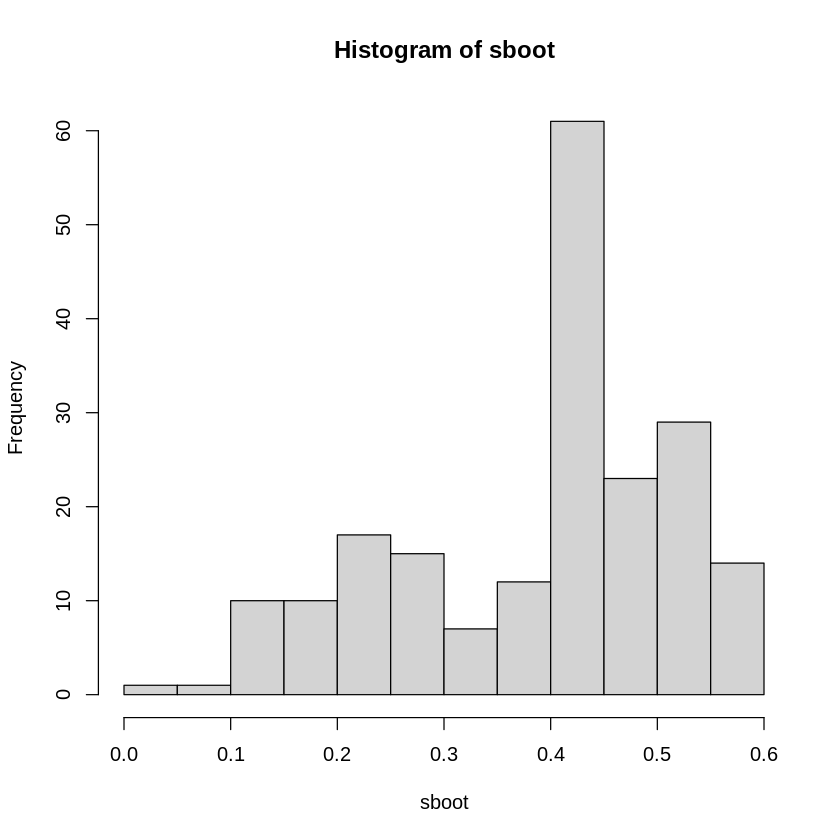

In [ ]:
s = sd(x); cat("s is ", s)
sboot = apply(bootsamples, 2, sd); hist(sboot);

[1]   8 200

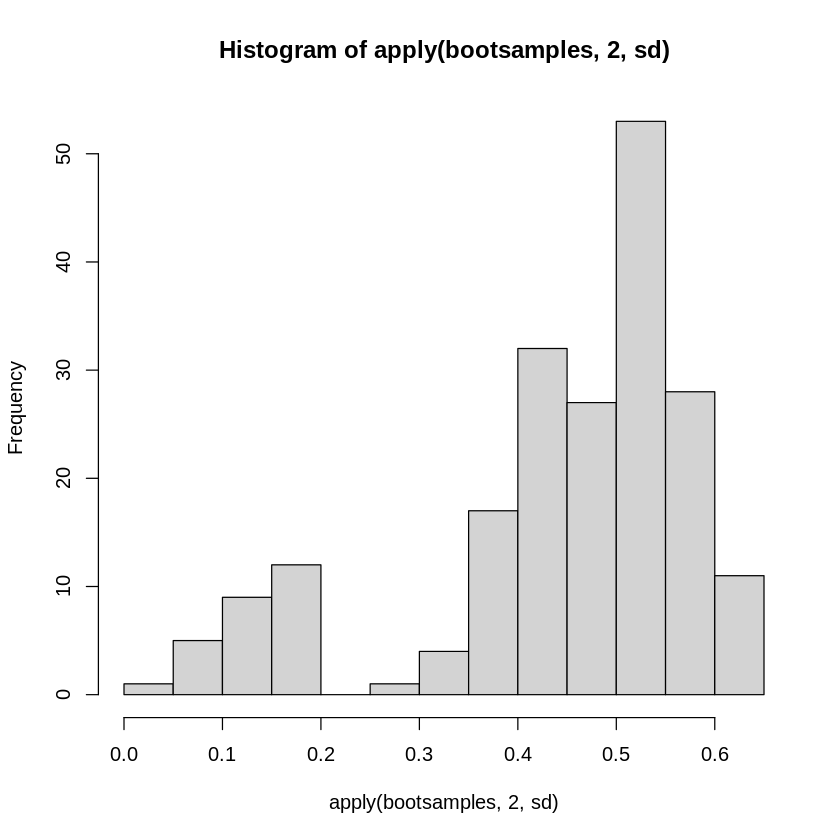

In [6]:
n=8
alpha = 3
beta = 4
X = rgamma(n,alpha,beta)
sigma = sqrt(alpha/beta^2)


B = 200
bootsamples=replicate(B, sample(X,n,replace=TRUE))
dim(bootsamples)

hist(apply(bootsamples, 2,sd))

**B.1(e) Use the `quantile()` function to find the 5th and 95th percentile of the distribution of  $s^*_i$. Use these values to calculate the $90\%$ boostrap pivot confidence interval and bootstrap percentile confidence interval for $\theta$.**

In [ ]:
q = as.numeric(quantile(sboot, c(0.05,0.95))); 
CI = c(2*sd(x) - q[2], 2*sd(x) - q[1]); CI

[1] 0.3034354 0.7184680

**B.1(f) Interpret this confidence interval.**

If we repeatedly sample from the population and use this procedure to calculate a confidence interval, approximately 90% of those intervals will cover the true parameter.

## Problem B.2: The parametric bootstrap

Suppose that $X_1,...,X_n \overset{iid}{\sim}N(\mu, \sigma^2)$, where $\sigma$ is known, and we are ultimately interested in an estimator for $\theta = \mu^2$.


Thus far, we've been looking at the *nonparametric bootstrap*. In this problem, we look at the *parametric bootstrap* as a way of estimating the bias and variance of an estimator $\widehat{\theta} = \bar{X}^2$ of $\theta = \mu^2$.

**B.2(a) Generate $X_1,...,X_{20} \overset{iid}{\sim}N(\mu = 2, \sigma^2 = 1)$, and then forget that you know $\mu$ and $\sigma^2$. Find the sample mean and sample variance.**

In [ ]:
set.seed(232)
n = 20; x = rnorm(n, 2, 1); xbar = mean(x); xvar = var(x); 
cat("The sample mean is", xbar,". The sample variance is ",xvar,".")

The sample mean is 2.349677 . The sample variance is  0.7211023 .

**B.2(b) Define $\widehat{N}$ to be the distribution of the variable $X_i$ in the population with the sample estimates plugged in for the unknown population parameters. Write down $\widehat{N}$ based on the data generated in (a).**

$\widehat{N} \approx N(2.35, 0.72)$. 

**(c) Draw $B = 500$ parametric bootstrap samples from $\widehat{N}$, and for each bootstrap sample $(X_{1,j},...,X_{20,j})$, compute $$ \widehat{\theta}^*_j = \bigg(\frac{1}{20}\sum^{20}_{i=1}X^*_{i,j}\bigg)^2,$$ where $j = 1,...,B$.**

[1]  20 500

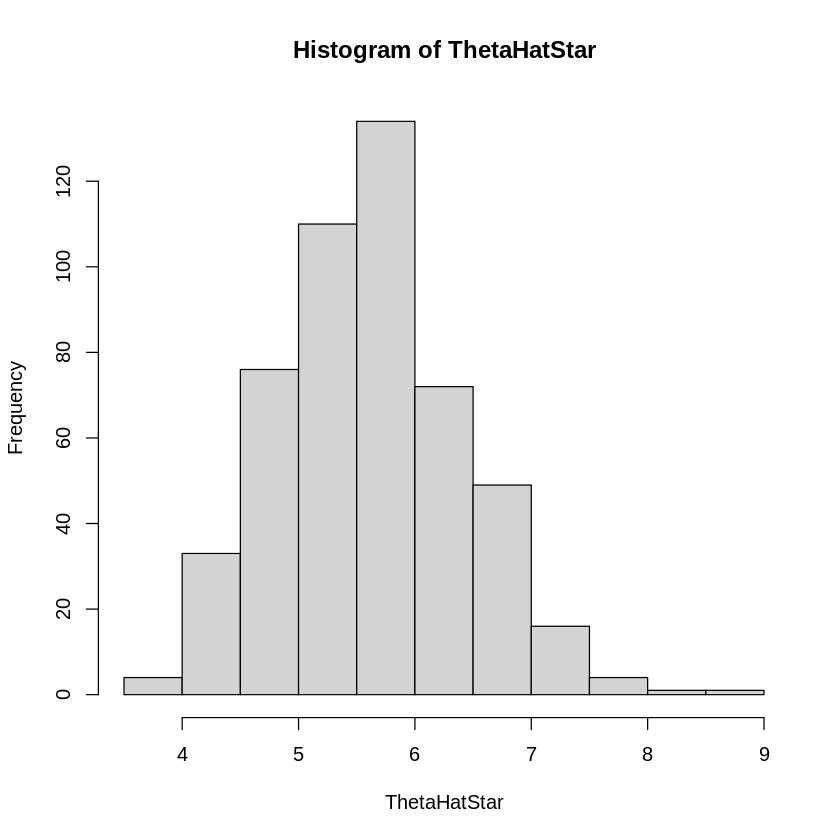

In [ ]:
set.seed(232)
B = 500;
bs = replicate(B, rnorm(n, xbar, xvar)); dim(bs)
ThetaHatStar = colMeans(bs)^2; hist(ThetaHatStar)

**B.2(d) Compute an estimate of the bias:**

\begin{align*}
\widehat{B}(\widehat{\theta}) \approx \frac{1}{B}\sum^B_{j=1}\widehat{\theta}^*_j - \bar{X}^2.
\end{align*}

**Compare this to the exact bias using the formula $\displaystyle Bias(\widehat{\theta}) = Bias(\bar{X}^2) = E(\bar{X}^2) - \mu^2 = \frac{\sigma^2}{n}$.**

In [ ]:
biasEst = mean(ThetaHatStar) - xbar^2;
bias = 1/n; 
cat("The bootstrap estimate of the bias is ", biasEst,". The true bias is ",bias,".")

The bootstrap estimate of the bias is  0.09084733 . The true bias is  0.05 .

**B.2(e) Compute an estimate of the variance:**

\begin{align*}
\widehat{\text{Var}}(\widehat{\theta}) \approx \frac{1}{B-1}\sum^B_{j=1}\big(\widehat{\theta}^*_j - \bar{\theta} \big)^2,
\end{align*}
where 
\begin{align*}
\bar{\theta} = \frac{1}{B}\sum^B_{j=1}\widehat{\theta}^*_j .
\end{align*}
**Compare this to the exact variance:**

\begin{align*}
Var(\bar{X}^2) &=  4\frac{\sigma^2}{n}\mu^2 + 2\frac{\sigma^4}{n^2}
\end{align*}

In [ ]:
vEst = 1/(B-1)*sum((ThetaHatStar - mean(ThetaHatStar))^2); 
v = 4*4/n+2/n^2
cat("The bootstrap estimate of the variance of our estimator is ", vEst,". The true variance of our estimator is ",v,".")

The bootstrap estimate of the variance of our estimator is  0.6252021 . The true variance of our estimator is  0.805 .

#### (f) True or False: For a fixed sample size $n = 20$, as $B$ increases, $\widehat{Bias}(\widehat{\theta})$ will approach ${Bias}(\widehat{\theta})$.  That is, for a fixed $n$, the bootstrap estimate of the bias will approach the true bias as the number of bootstrap samples, $B$ increases. You might consider running a simulation to decide!

False. As $B$ increases, the boostrap bias approaches the "plug in" bias estimate, $S^2\big/n$, not the true bias $\sigma^2\big/n$.

## Problem B.3 Bootstrap with real data

The "Wisconsin Card Sorting Test" is widely used by psychiatrists, neurologists, and neurophycologists with patients who have a brain injury. Patients with any sort of frontal lobe lesion generally do poorly on the test. The data frame WCST contains the test scores from a group of 50 patients from the *Virgen del Camino* Hospital.

**B.3(a) Using the code below, load the WCST data and explore whether there is reason to believe that the score data comes from a non-normal distribution. First, create a histogram (use ggplot!) and describe whether the data look normal. Then, use the function shapiro.test() to explore normality. Be sure to explain what this function does - i.e., what's the null and alternative hypothesis - in your answer.**

In [ ]:
wcst = read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/wcst.txt")


,score
,<int>
1,23
2,12
3,31
4,8
5,19
6,11



	Shapiro-Wilk normality test

data:  wcst$score
W = 0.77472, p-value = 2.405e-07


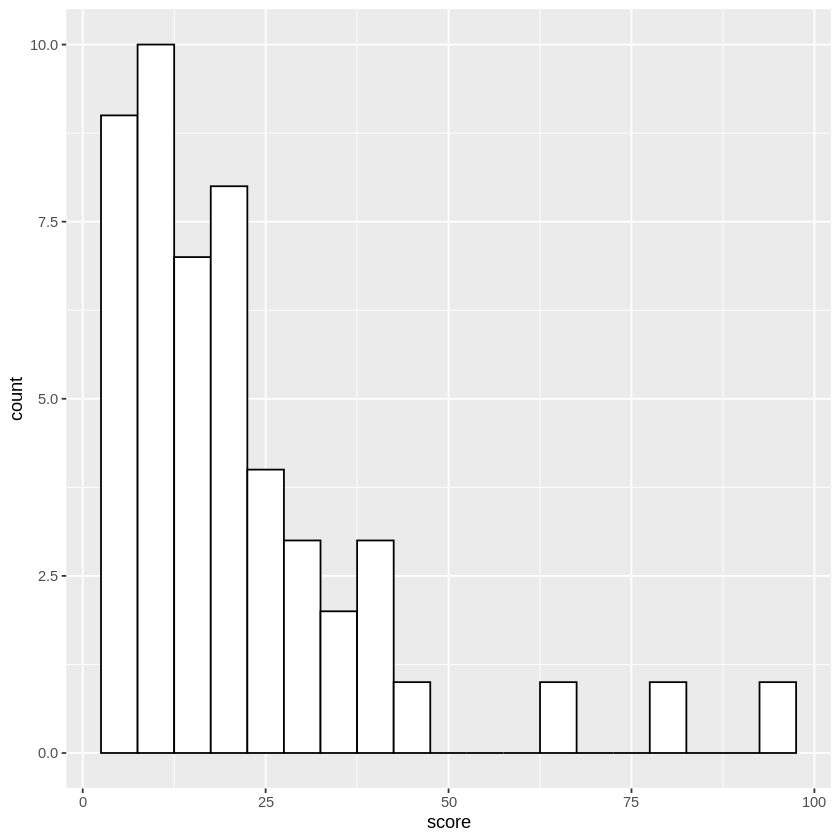

In [ ]:
library(ggplot2)
head(wcst)

#Normality exploration
ggplot(data = wcst) + 
geom_histogram(mapping = aes(x = score),color = "black", fill = "white", binwidth = 5)
shapiro.test(wcst$score)

The histogram suggests that the data are not normal. The Shiparo-Wilk test for normality tests $H_0:$ *The data come from a normal population* against $H_1:$ *The data don't come from a normal population*. The small p-value suggests that we should reject the null hypothesis.

**B.3(b) What assumptions must be made in order to compute a (non-boostrap) 95% confidence interval for the population mean score?**

We would assume that $\bar{X}$ follows a normal distribution (at least approximately), as suggested by the central limit theorem. Because $n = 50$, this assumption isn't unreasonable.

In [ ]:
sum(sapply(xbarhatstar, function(x) {return(ifelse(mean(x) < 33.02 - 6.81 || mean(x) > 33.02, 1, 0))})) / B

**B.3(c) Compute the confidence interval referred too in B.3(b).**

In [ ]:
n = length(wcst$score); xbar = mean(wcst$score); s = sd(wcst$score); 
e = 1.96*(s/sqrt(n))
ci = c(xbar - e, xbar + e); ci

[1] 16.37808 26.58192

**B.3(d) Compute a 95% bootstrap pivot confidence interval for the mean.**

In [ ]:
B = 5000; bs = replicate(B, sample(wcst$score, n, replace = TRUE))
xbarstar = colMeans(bs)
q = as.numeric(quantile(xbarstar, probs = c(0.025, 0.975)))
l = 2*xbar - q[2]
u = 2*xbar - q[1]
ci2 = c(l,u); ci2

[1] 16.1395 26.1600

## Problem B.4 Bootstrap assumptions 
The dataset gives the number of births per month in New York city, from January 1946 to December 1959. The data are ordered.

**B.4(a) Construct another column in the dataset that labels the month and year for each birth per month record.**

The `as.Date()` function may help with this task.

In [ ]:
library(tidyverse)
library(ggplot2)
births = read.table("https://robjhyndman.com/tsdldata/data/nybirths.dat", sep = "\t")
births = data.frame(births)
names(births) = "births"
n = length(births$births)
head(births)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,births
,<dbl>
1,26.663
2,23.598
3,26.931
4,24.740
5,25.806
6,24.364


In [ ]:
births$month = rep(1:12, n/12)
births$day = rep(1,n)
births$year = rep(1946:1959, each = 12)
births$date = with(births, sprintf("%d-%02d-%02d", year, month, day))
births = as_tibble(births)
births$date = as.Date(births$date,"%Y-%m-%d")
head(births)

births,month,day,year,date
<dbl>,<int>,<dbl>,<int>,<date>
26.663,1,1,1946,1946-01-01
23.598,2,1,1946,1946-02-01
26.931,3,1,1946,1946-03-01
24.740,4,1,1946,1946-04-01
25.806,5,1,1946,1946-05-01
24.364,6,1,1946,1946-06-01


**B.4(b) Construct a plot of births per month against the month/year column that you created in part (a). Analyze the plot. Do you notice anything interesting?**

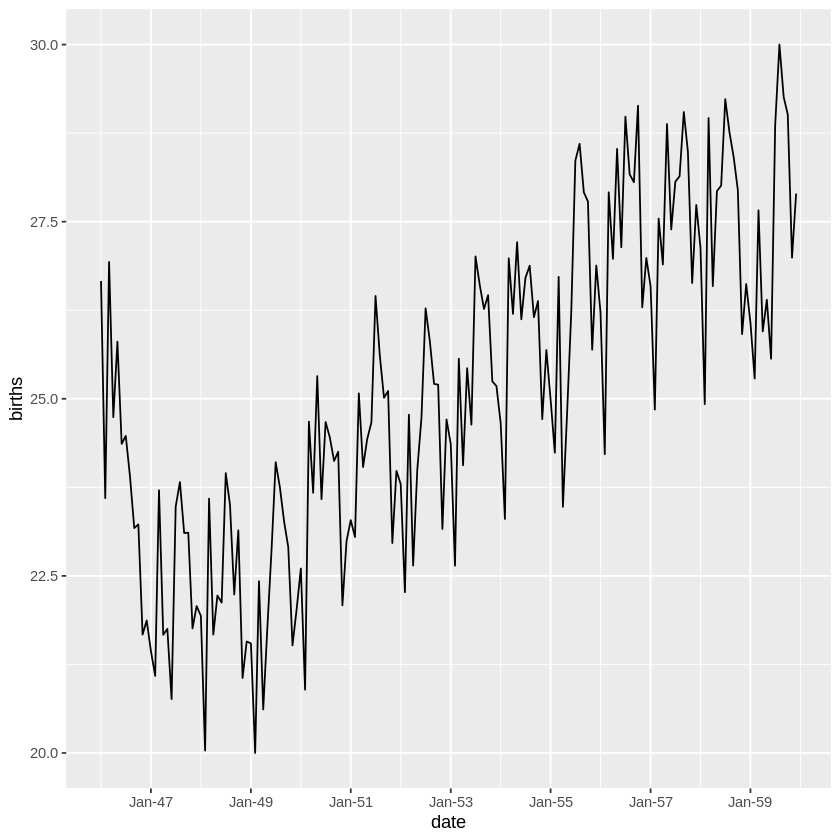

In [ ]:
p = ggplot(births, aes(x = date, y = births))
p = p + geom_line() 
p = p + scale_x_date(date_breaks = "2 years" , date_labels = "%b-%y")
p

**B.4(c) Suppose that your boss asked you to use the bootstrap to construct a confidence interval for the average number of births per month in New York city over the time period in the dataset. Write a short response to your boss describing why this confidence interval is not valid for these data.**

The bootstrap confidence interval would not be valid because the data are not independent and identically distributed. This is clear in the plot above. In particular, there is a clear trend in the mean of births, which violates the identically distributed assumption. The mean decreases from January 1946 to around January 1949, and then increases through December 1959.

## B.5 Bootstrap hypothesis testing

In this problem, we'll walk through a bootstrap hypothesis test.

The newcomb dataset contains a numeric vector giving the ‘Third Series’ of measurements of the passage time of light recorded by Newcomb in 1882. The given values divided by 1000 plus 24 give the time in millionths of a second for light to traverse a known distance. The ‘true’ value is now considered to be 33.02.

Our goal is to test the hypotheses that $$H_0: \mu = 33.02 \, \, vs. \, \, 
H_1: \mu \ne 33.02.$$

We will choose the $\alpha = 0.05$ level, and use $\bar{X}$ as the test statistic. 

**B.5(a) Load the newcomb data and decide whether you think it comes from a normal distribution.**

In [ ]:
library(MASS)
data(newcomb); n = length(newcomb); xbar = mean(newcomb); 
xbar
df = data.frame(newcomb);


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




[1] 26.21212


	Shapiro-Wilk normality test

data:  newcomb
W = 0.59115, p-value = 2.842e-12


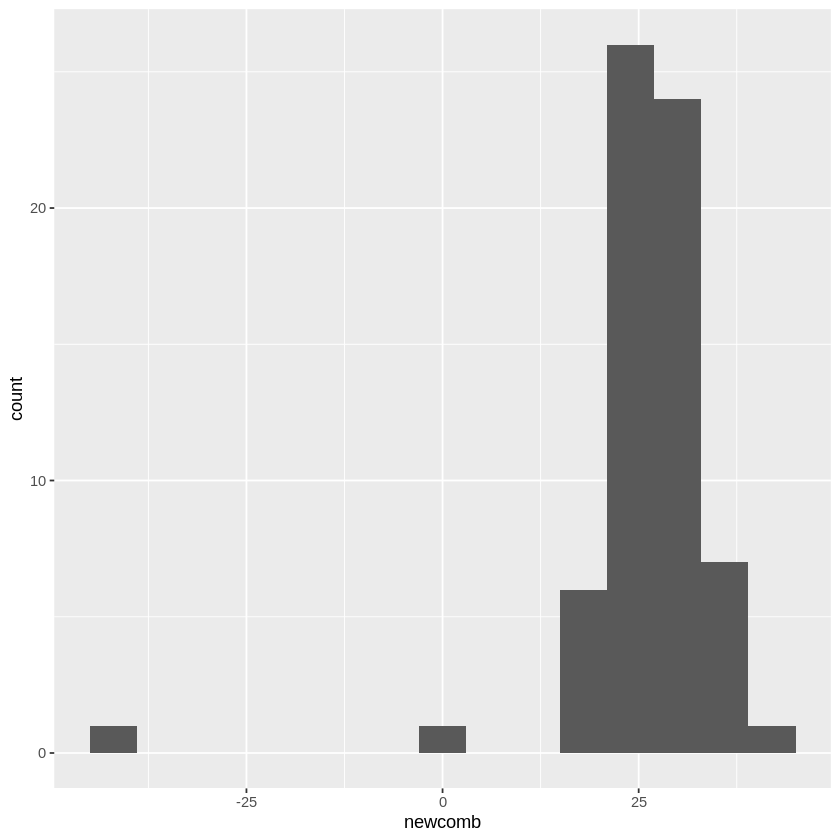

In [ ]:
library(ggplot2)
ggplot(data = df)+
geom_histogram(mapping = aes(x = newcomb), bins = 15)

shapiro.test(newcomb)

The histogram does not look normal, and the Shapiro-Wilk test rejects the null that the data are from a normal population. 


Now, since our test statistic is $\bar{X}$, the CLT *might* help us. But maybe not. So, let's assume not (and we might see why later). We'll use the bootstrap to test our hypotheses.

**B.5(b) Shift the data so that the mean is the value under the null.**

In [ ]:
newnewcomb = newcomb - xbar + 33.02; mean(newnewcomb)

[1] 33.02

This shifted data now serves as a stand in for our population under the null. We use it to resample from.

**B.5(c) Resample with replacement from the data $B = 10^5$ times and calculate the mean for each sample. This is the bootstrap distribution of $\bar{X}$.**

[1]     66 100000

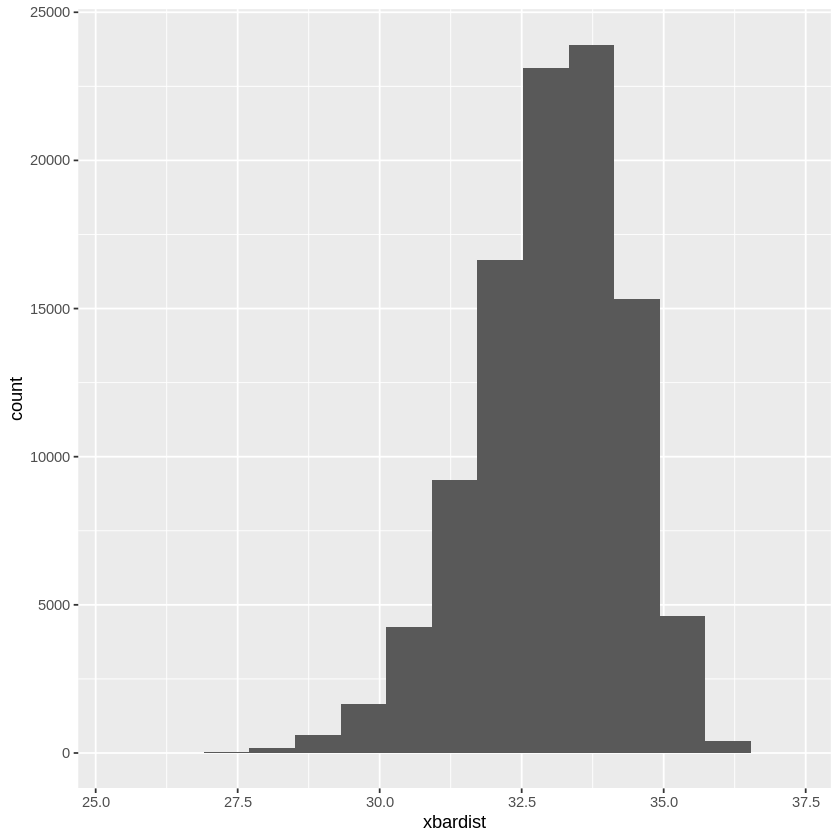

In [ ]:
set.seed(99199)
B = 10^5; bs = replicate(B, sample(newnewcomb, n, replace = TRUE)); dim(bs)
xbardist = colMeans(bs); 
xbardistst = (xbardist - mean(xbardist))/sd(xbardist)
dfmeans = data.frame(xbardist)
ggplot(data = dfmeans)+
geom_histogram(mapping = aes(x = xbardist), bins = 15)

Notice that the distribution here is skewed left, and thus, not quite normal. So, we were right not to use the "normal theory" result!

The p-value is the probability of getting something more extreme than what we observed. 26.21--the observed sample mean--is $33.02 - 26.21 = 6.81$ units away from the mean under $H_0$. So our p-value is the probability of being more than 6.81 units away from 33.02.

**B.5(d) Estimate this probability using the bootstrap distribution of $\bar{X}$. Then, use the p-value to make a decision about the hypotheses.**

In [ ]:
dist = 33.02 - xbar
cutOffLow = 33.02 - dist; cutOffHigh = 33.02 + dist
pvalue = (sum(xbardist < cutOffLow) + sum(xbardist > cutOffHigh))/B
cat("The p-value is", pvalue,".")

The p-value is 4e-05 .

Note that the p-value is less than $\alpha = 0.05$, so we would reject $H_0$.  

We can compare this to a t-test, but we should note that the t-test isn't appropriate because the normal population assumption isn't met.

In [ ]:
t.test(newcomb,alternative="two.sided",mu=33.02)



	One Sample t-test

data:  newcomb
t = -5.1471, df = 65, p-value = 2.648e-06
alternative hypothesis: true mean is not equal to 33.02
95 percent confidence interval:
 23.57059 28.85365
sample estimates:
mean of x 
 26.21212 


## B.6 Other test statistics (extra practice, not graded)

Let $X_1, ..., X_n \stackrel{\text{iid}}{\text{~}} Exp(\lambda)$. A company claims that the lifetime of their lightbulbs is longer than the lifetime of the leading brand, which is six years. You are going to test the hypothesis: $H_0 : \mu \leq 6, H_1 : \mu > 6$. 


**B.6(a) Assume $n > 30$. We know from the CLT that $\bar{X} ∼ N(\mu, \sigma^2/n)$.  Show that $n\bar{X} ∼ N(n\mu, n\sigma^2)$.**

$$E[X]=\mu$$
$$Var[X]=\sigma^2/n$$
$$E[nX]=nE[X]=n\mu$$
$$Var[nX]=n^2Var[X]=\frac{n^2\sigma^2}{n}=n\sigma^2$$

**B.6(b) You are going to perform a hypothesis test using $\sum_{i=1}^{n}X_i$ instead of $\bar{X}$. What is your test statistic and decision rule for determining whether the null hypothesis should be rejected?**

We know $\sum_{i=1}^{n}X_i= n\bar{X} $. This means we want to test how close this is to $n\mu$, with the new standard deviation represented by $\sqrt{n\sigma^2}$. These are the values that will be used in the test statistic, shown below. 

$$z^*=\frac{n\bar{X}-n\mu_0}{S\sqrt{n}}$$

The decision rule remains the same, since this test statistic will still represent a z value. 

$$ z^* > z_\alpha $$

**Part B.6(c) Perform the test of hypothesis with $\alpha = 0.005$ using your test procedure, with $n = 45$, $\sum_{i=1}^{n}X_i = 312.85$, and $s = 7.45$.**

$$z^*=\frac{312.85-6(45)}{7.45\sqrt{45}}= 0.8574 $$

In [ ]:
qnorm(0.005)

[1] -2.575829

$$z_\alpha=2.576$$
$$z^*=0.8574 < 2.576 $$
This the test statistic does not fall in the rejection region. So there is insufficient evidence to reject the null hypothesis. 

**B.6 (d) What is the p-value of your test? Provide an interpretation of this p-value.**

The p value of this test, calculated in R, is shown below and is around 0.1956. This means that there is about a 20% chance of our data being as far or farther from the true mean under the null hypothesis. 

In [ ]:
pnorm(0.8574)
1-pnorm(0.8574)

[1] 0.8043881

[1] 0.1956119